# This notebook outlines the spatial processing approach for the JOC article
    
To access the data and run the notebooks, you must perform the following steps:

1) Navigate to http://tiny.cc/JOC-XX-XXXX, where the XX-XXXX is the manuscript number on manuscript central.

2) Download the file, named data.tar.gz.  It has the following checksum information:

![title](checksum.jpg)

3) ungz and untar the folder 'data' into the mcs_future folder. These files represent post-processed data and not the entire dataset.  This is due to the very large size of the three datasets, the raw derived data, and the amount of time it takes to run the training and classification.  However, applying the methods of this paper to the publically available data will give you the same results. If you downloaded the entire github project, the directories for the data folder and its subfolders should be:

/MCS/mcs_future/data/raw_data

/MCS/mcs_future/data/shapefiles

/MCS/mcs_future/data/slice_data

/MCS/mcs_future/data/wrf_data

In [1]:
import sys
sys.path.append('C:/users/ahaberlie/documents/github/MCS/')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
from netCDF4 import Dataset
import pickle
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
projection = ccrs.LambertConformal()
axes_class = (GeoAxes,
              dict(map_projection=projection))

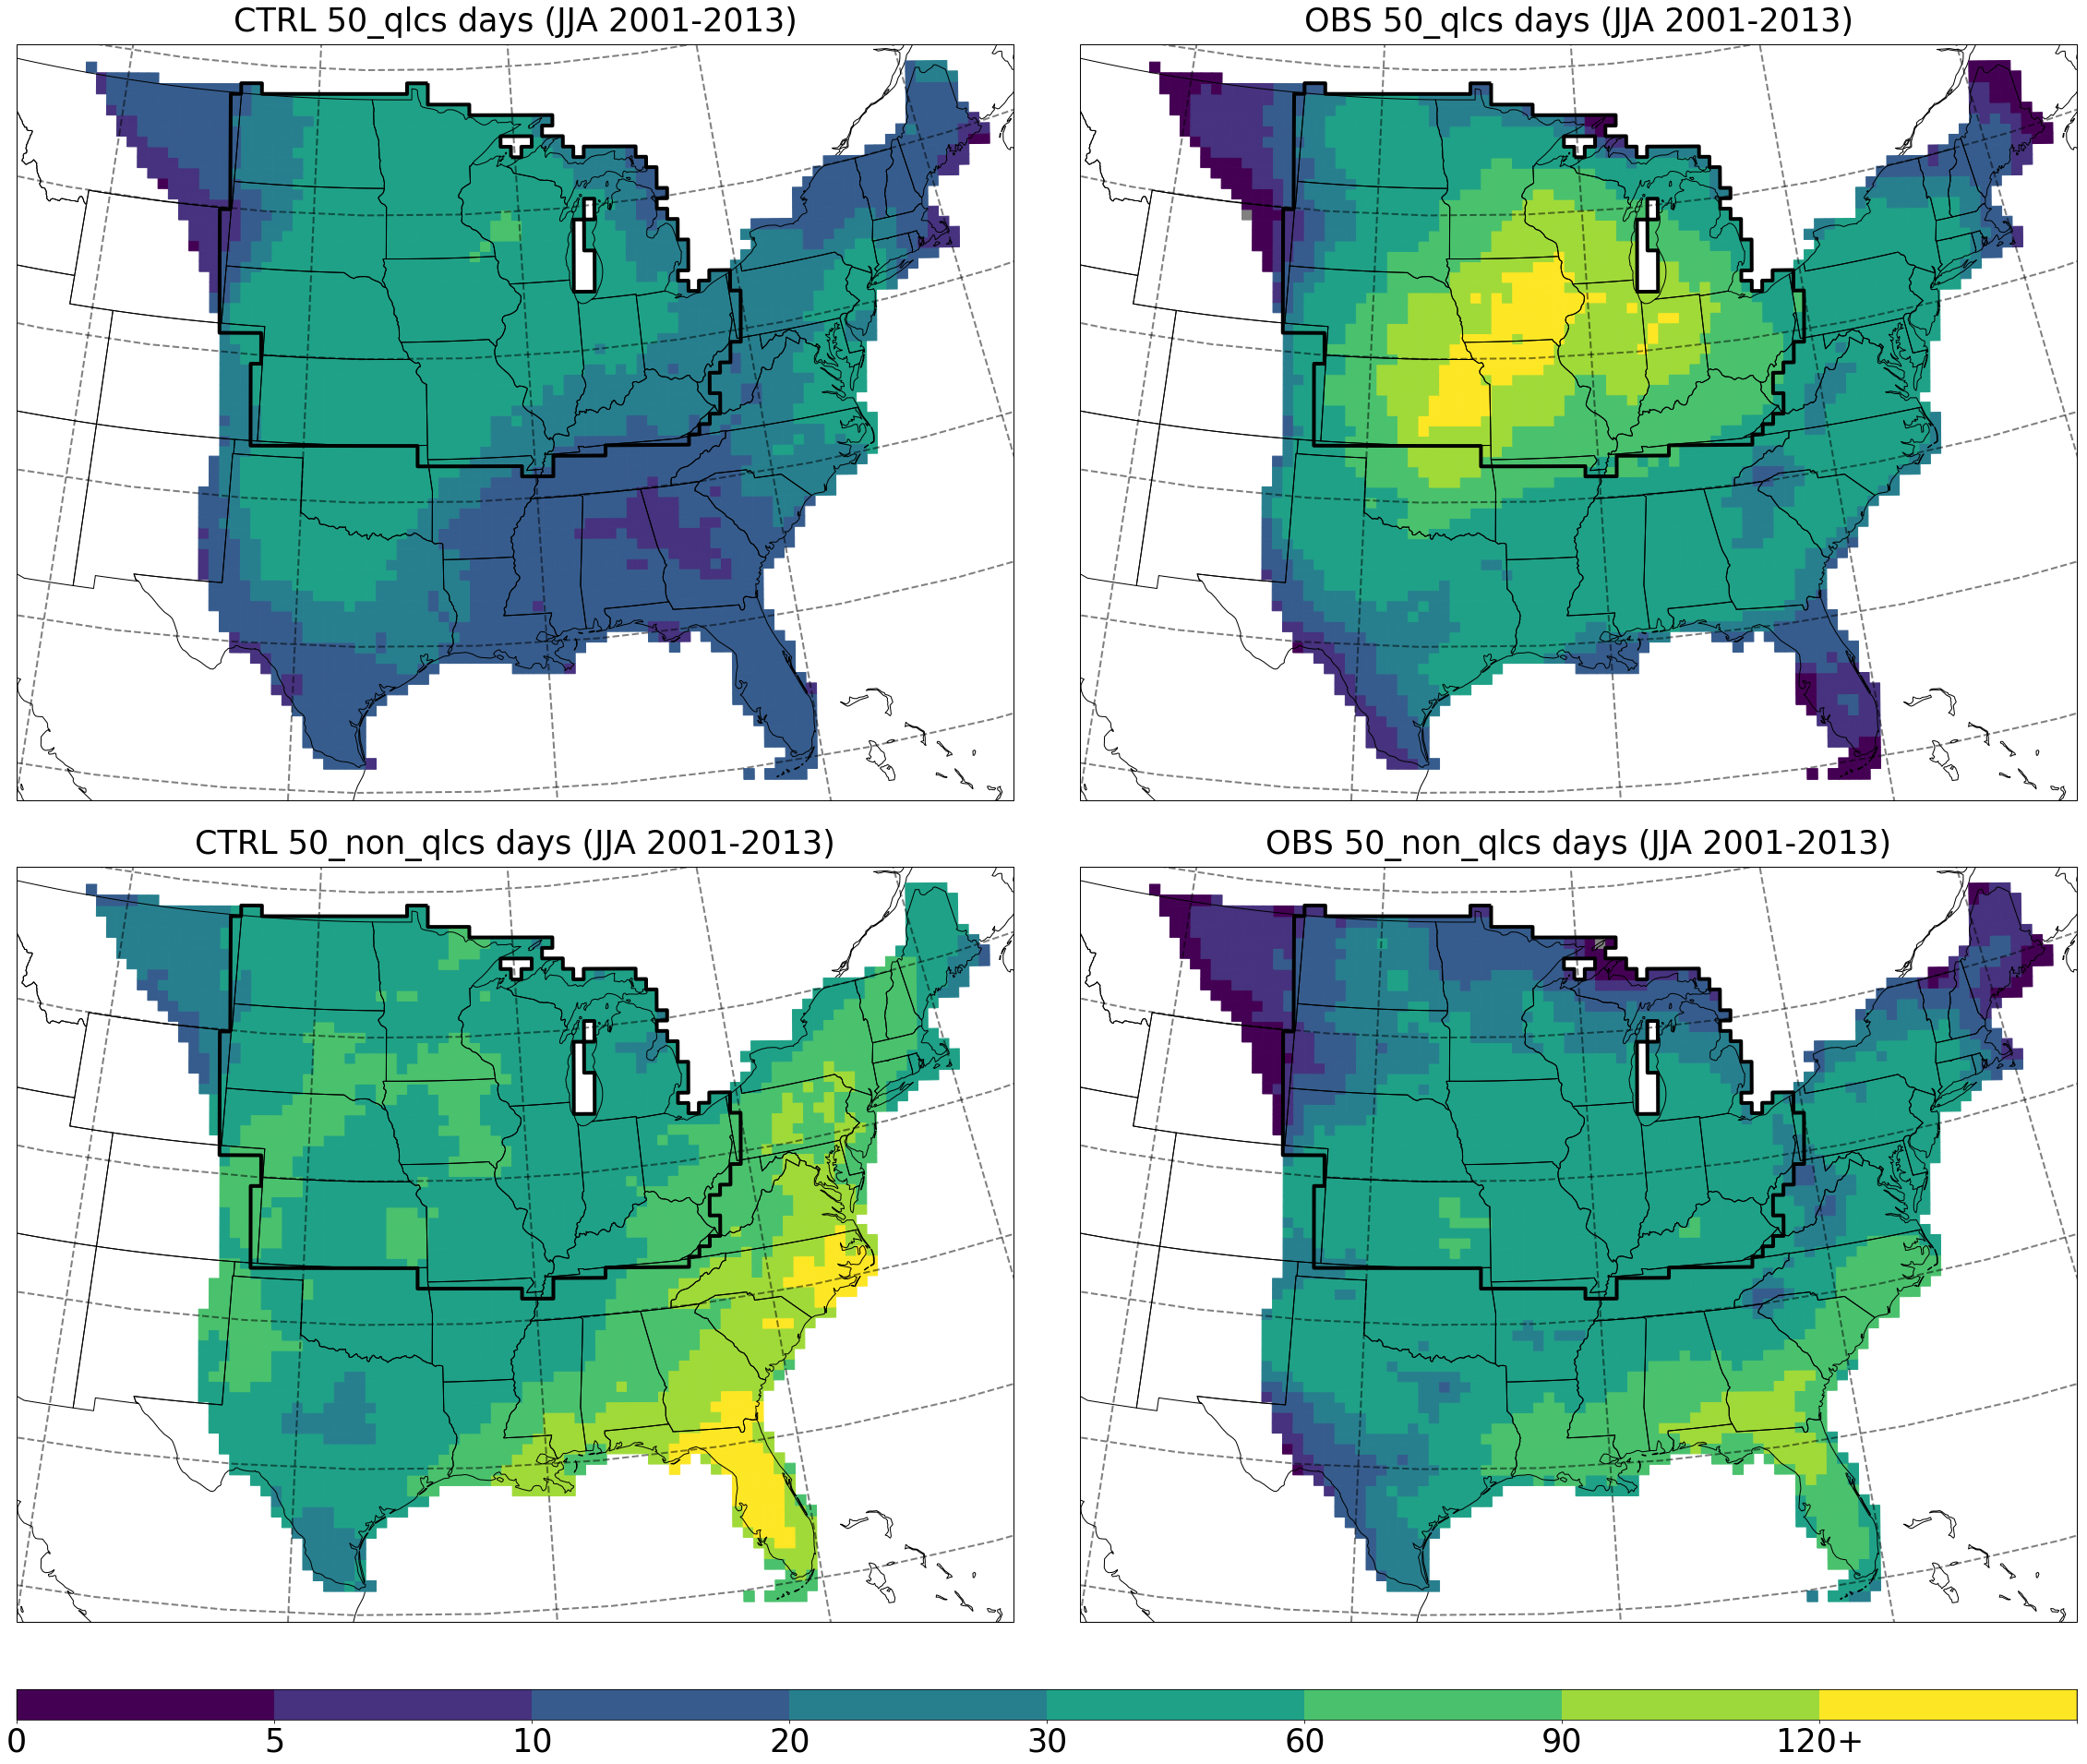

In [2]:
from mcs_future.utils.mapping_help import (get_season_mcs, draw_grids_season, 
                                           draw_states, draw_midwest, lambert_xticks, lambert_yticks)

plt.rcParams['figure.figsize'] = 40,40
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30

def draw_labels(ax, axgr):

    x = list(range(0,9))
    y = list(range(0,9))

    cmap = plt.cm.viridis
    classes = x
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(x, y)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(x)
    axgr.cbar_axes[0].set_xticklabels(['0', '5', '10', '20', '30', '60', '90', '120+'], fontsize=35)
    

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(2, 2),
                axes_pad=1,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=0.01,
                cbar_size='2%',
                label_mode='')

mo = ['CTRL', 'OBS', 'CTRL', 'OBS']
rid = ['50_qlcs', '50_qlcs', '50_non_qlcs', '50_non_qlcs']

for i, ax in enumerate(axgr):

    ax.set_extent([-110, -73, 24, 49], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    
    geom, ctrlvals = get_season_mcs(mo[i], 'JJA', rid[i])
    
    draw_grids_season(ax, geom, ctrlvals, 7)
    
    draw_states(ax)
    draw_midwest(ax)

    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks, fontsize=20)
    lambert_yticks(ax, yticks, fontsize=20)
    ax.set_title(mo[i] + " " + rid[i] + " days (JJA 2001-2013)", fontsize=35, y=1.01)

ax = draw_labels(ax, axgr)

plt.savefig("Figure3a.tif", dpi=400, bbox_inches='tight')

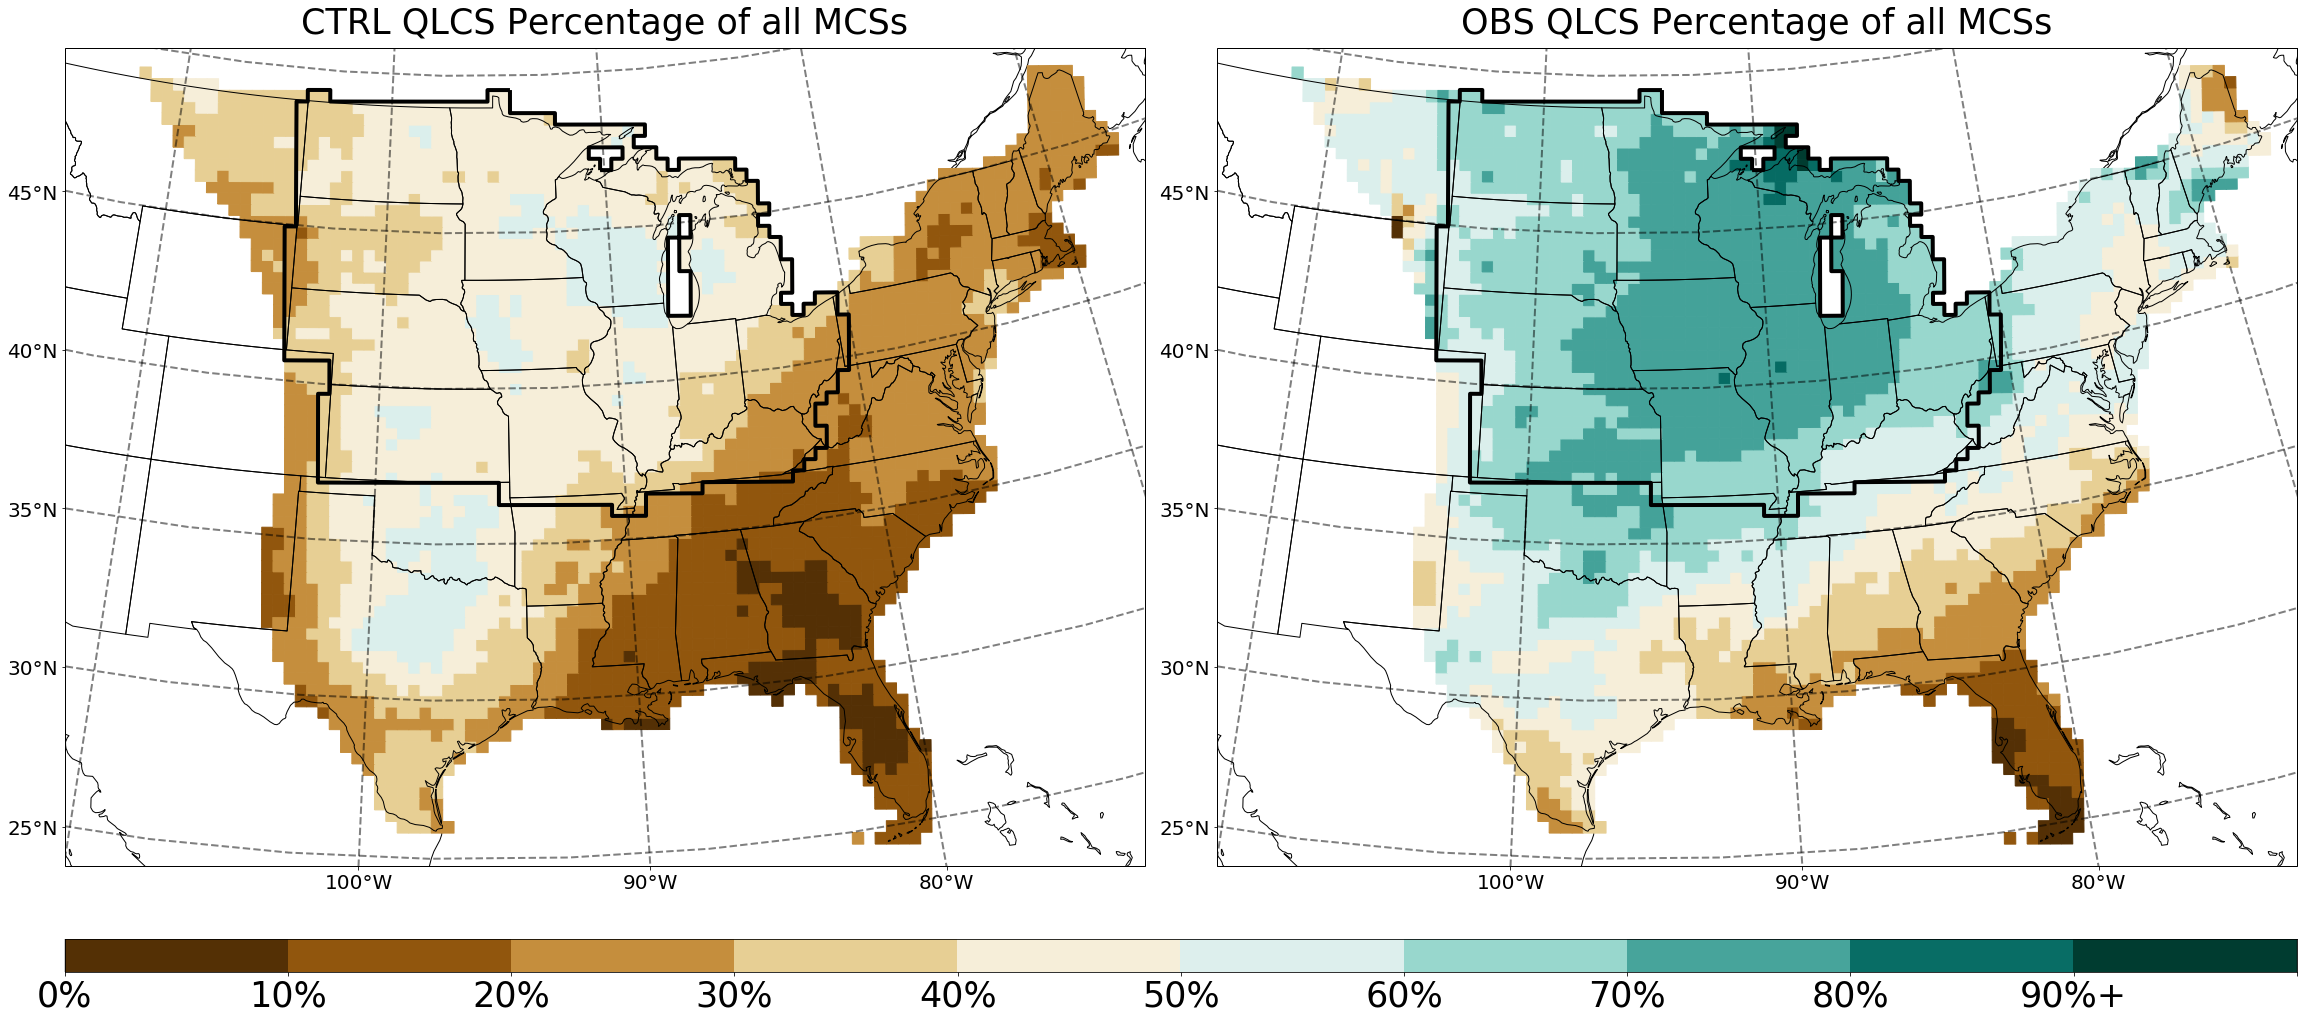

In [3]:
from mcs_future.utils.mapping_help import (get_season_mcs, draw_perc_agw_prop, 
                                           draw_states, draw_midwest, lambert_xticks, lambert_yticks)

def draw_labels(ax, axgr):
    
    x = list(range(0,11))
    y = list(range(0,11))

    cmap = plt.cm.BrBG
    classes = x
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(x, y)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(x)
    axgr.cbar_axes[0].set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%+'], 
                                      fontsize=35)

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 2),
                axes_pad=1,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=0.01,
                cbar_size='2%',
                label_mode='')

dn = ['val', 'pgw', 'pgw', 'pgw']
rid = ['50_qlcs', '50_non_qlcs', '50_qlcs', '50_non_qlcs']

titles = ['CTRL QLCS Percentage of all MCSs', 'OBS QLCS Percentage of all MCSs']

for i, ax in enumerate(axgr):

    ax.set_extent([-110, -73, 24, 49], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    
    if dn[i] == 'val':
        
        geom, mcs_total = get_season_mcs('CTRL', 'JJA', '95_mcs')
        geom, qlcs_total = get_season_mcs('CTRL', 'JJA', '50_qlcs')
        
    elif dn[i] == 'pgw':
        
        geom, mcs_total = get_season_mcs('OBS', 'JJA', '95_mcs')
        geom, qlcs_total = get_season_mcs('OBS', 'JJA', '50_qlcs')

    
    draw_perc_agw_prop(ax, geom, 100*(qlcs_total/mcs_total))
    
    draw_states(ax)
    draw_midwest(ax)
    fig.canvas.draw()

    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks, fontsize=20)
    lambert_yticks(ax, yticks, fontsize=20)
    ax.set_title(titles[i], fontsize=35, y=1.01)

draw_labels(ax, axgr)

plt.savefig("Figure3b.tif", dpi=400, bbox_inches='tight')

C:\Users\ahaberlie\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in true_divide


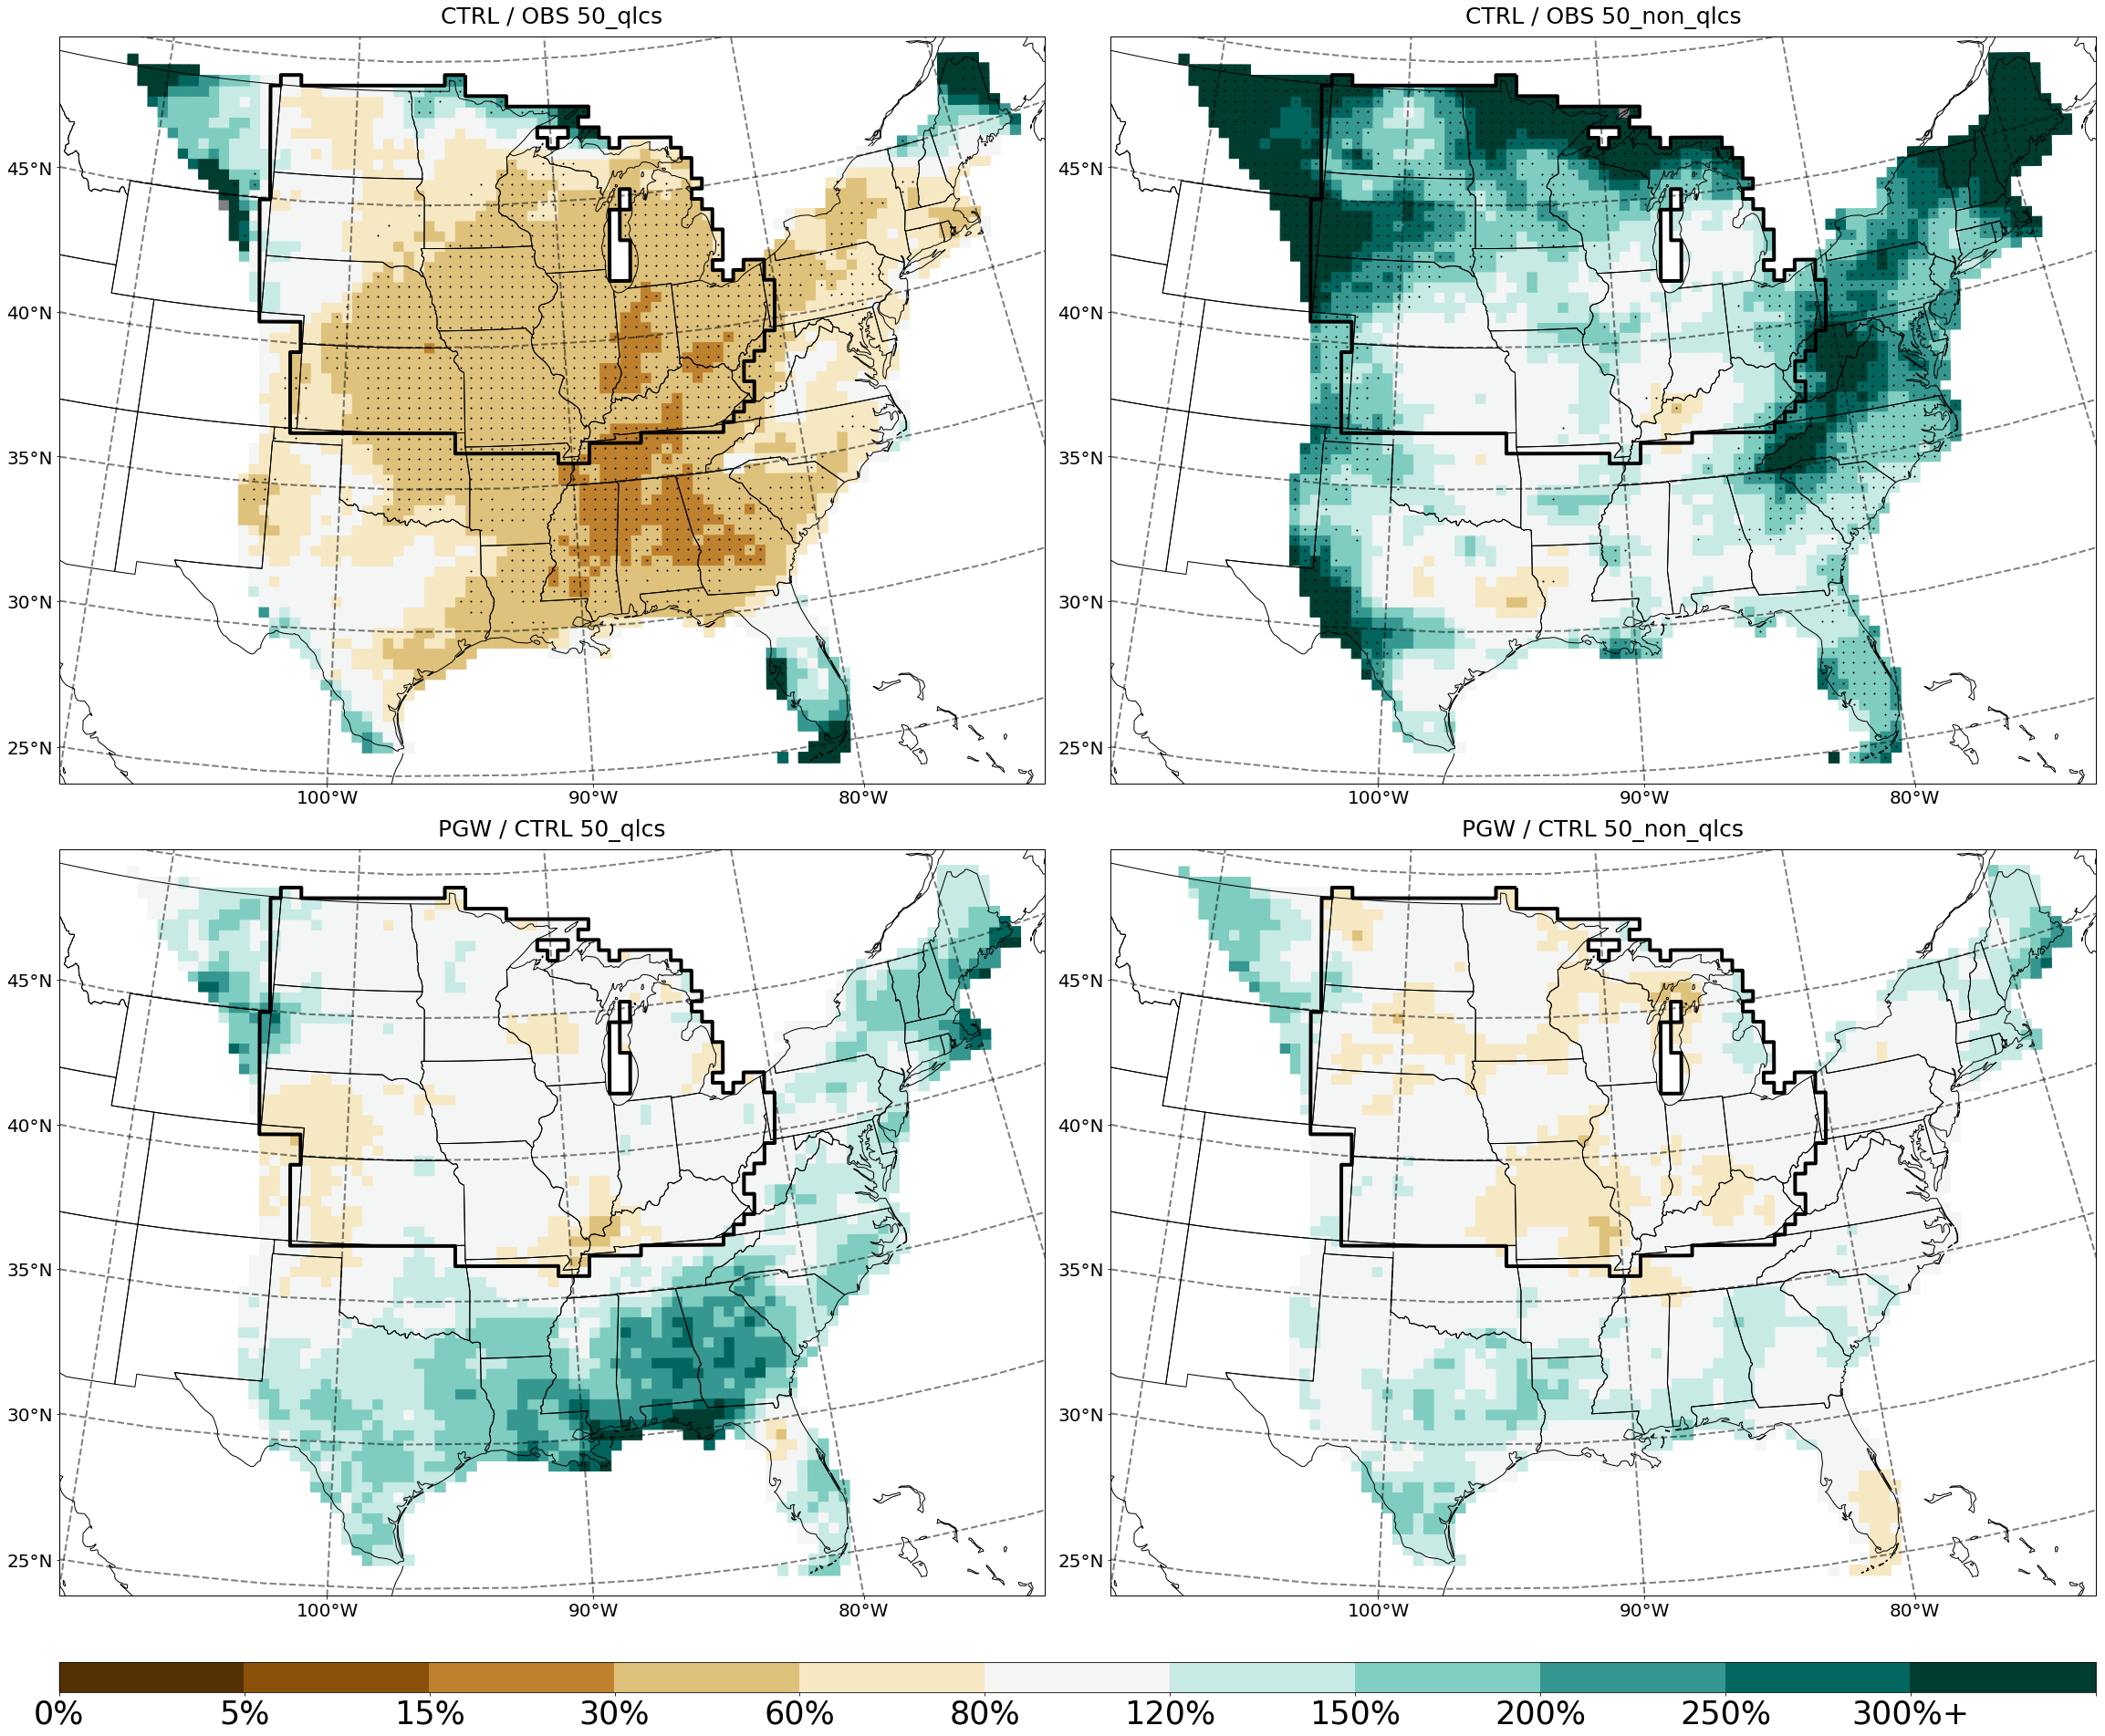

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
from scipy.stats import ks_2samp

from statsmodels.sandbox.stats.multicomp import multipletests

from mcs_future.utils.mapping_help import (get_season_mcs, draw_perc_agw, 
                                           draw_states, draw_midwest, lambert_xticks, lambert_yticks)

plt.rcParams['figure.figsize'] = 40,40
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30

def draw_labels(ax, axgr):
    
    x = list(range(0,12))
    y = list(range(0,12))

    cmap = plt.cm.BrBG
    classes = x
    norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)

    xg, yg = np.meshgrid(x, y)
    p = ax.pcolormesh(xg, yg, xg, norm=norm, cmap=cmap)

    axgr.cbar_axes[0].colorbar(p)
    axgr.cbar_axes[0].set_xticks(x)
    axgr.cbar_axes[0].set_xticklabels(['0%', '5%', '15%', '30%', '60%', '80%', 
                                       '120%', '150%', '200%', '250%', '300%+'], fontsize=35)

def plot_sig(view, season, run, data1, data2):
    
    fname = "{}_{}_{}_DIF_{}_pgw.shp".format(season, data1, data2, run)
    a = gpd.read_file("F:/shapefiles_day/diff/" + fname)
    p = multipletests(a.p_vals.values, alpha=0.1, method='fdr_bh')[0]

    a_fdr = a[p]

    if len(a_fdr) > 0:
        view.plot(a_fdr.geometry.centroid.x, a_fdr.geometry.centroid.y, 'k.', 
                  markersize=2, transform=ccrs.PlateCarree())
        
    return view

fig = plt.figure()
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(2, 2),
                axes_pad=1,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=0.01,
                cbar_size='2%',
                label_mode='')

dn = ['CTRL / OBS ', 'CTRL / OBS ', 'PGW / CTRL ', 'PGW / CTRL ']
rid = ['50_qlcs', '50_non_qlcs', '50_qlcs', '50_non_qlcs']

for i, ax in enumerate(axgr):

    ax.set_extent([-110, -73, 24, 49], crs=ccrs.PlateCarree())
    ax.coastlines(resolution='50m')
    
    if dn[i] == 'CTRL / OBS ':
        
        geom, obs_total = get_season_mcs('OBS', 'JJA', rid[i])
        geom, ctrl_total = get_season_mcs('CTRL', 'JJA', rid[i])

        ax = plot_sig(ax, 'JJA', rid[i], 'CTRL', 'OBS')
        
        draw_perc_agw(ax, geom, 100*(ctrl_total/obs_total))
        
    elif dn[i] == 'PGW / CTRL ':
        
        geom, ctrl_total = get_season_mcs('CTRL', 'JJA', rid[i])
        geom, pgw_total = get_season_mcs('PGW', 'JJA', rid[i])
        
        ax = plot_sig(ax, 'JJA', rid[i], 'CTRL', 'PGW')
    
        draw_perc_agw(ax, geom, 100*(pgw_total/ctrl_total))
    
    draw_states(ax)
    draw_midwest(ax)
    fig.canvas.draw()

    xticks = list(range(-170, -20, 10))
    yticks = list(range(10, 80, 5))
    ax.gridlines(xlocs=xticks, ylocs=yticks, linewidth=2, color='k', alpha=0.5, linestyle='--')

    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    lambert_xticks(ax, xticks, fontsize=20)
    lambert_yticks(ax, yticks, fontsize=20)
    ax.set_title(dn[i] + rid[i], fontsize=25, y=1.01)
    
draw_labels(ax, axgr)
plt.savefig("Figure4.tif", dpi=400, bbox_inches='tight')